In [ ]:
import tweepy 
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumer_key = 'tuconsumerkey'
consumer_secret = 'tuconsumersecret'
acces_token = 'tuaccestoken'
acces_t_secret = 'tuaccestokensecret'

In [ ]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

authenticate.set_access_token(acces_token, acces_t_secret)

api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
hashtag = api.user_timeline(screen_name='BillGates', lang='en', tweet_mode='extended', count=100)

In [ ]:
print('show 5 tweets')
i=1
for tweet in hashtag[:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i += 1

show 5 tweets
1) RT @melindagates: In 2020, global health went local. 

COVID-19 has shown us that what happens in one part of the world matters to the rest…

2) RT @codeorg: Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

3) RT @rajpanjabi: After being sworn in this morning, I'm honored to share that I've been appointed by @POTUS as the President’s Malaria Coord…

4) When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad): https://t.co/53Rf5uvjub https://t.co/rTmM7STl6U

5) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon: https://t.co/clsscPwQUD https://t.co/sNl4kT9bE3



In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in hashtag], columns=['Tweets'])
df.head()

,Tweets
0,"RT @melindagates: In 2020, global health went ..."
1,RT @codeorg: Only 3% of Black students learn c...
2,RT @rajpanjabi: After being sworn in this morn...
3,"When it comes to preventing pandemics, scienti..."
4,"COVID-19 has cost lives, sickened millions, an..."


In [ ]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z09]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/?', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(clean_text)
df.head()

,Tweets
0,": In 2020, global health went local. \n\nCOVID..."
1,: Only 3% of Black students learn computer sci...
2,": After being sworn in this morning, I'm honor..."
3,"When it comes to preventing pandemics, scienti..."
4,"COVID-19 has cost lives, sickened millions, an..."


In [ ]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df.head()

,Tweets,Subjectivity,Polarity
0,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000
1,: Only 3% of Black students learn computer sci...,0.657778,-0.002222
2,": After being sworn in this morning, I'm honor...",0.000000,0.000000
3,"When it comes to preventing pandemics, scienti...",0.321970,0.096591
4,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000


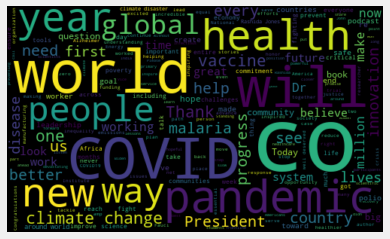

In [ ]:
all_words = ' '.join( [twts for twts in df['Tweets']])
word_Cloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def analysis(score):
  if score < 0:
    return 'Negative'
  # elif score == 0:
  #   return 'Neutral'
  # else:
  #   return 'Positive'
  elif score > 0:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(analysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,": In 2020, global health went local. \n\nCOVID...",0.000000,0.000000,None
1,: Only 3% of Black students learn computer sci...,0.657778,-0.002222,Negative
2,": After being sworn in this morning, I'm honor...",0.000000,0.000000,None
3,"When it comes to preventing pandemics, scienti...",0.321970,0.096591,Positive
4,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000,Negative
...,...,...,...,...
95,: As a community health worker in Kenya’s Homa...,0.000000,0.000000,None
96,The progress the world has made against malari...,0.575000,0.325000,Positive
97,"Move aside, . This is the still the world’s de...",0.000000,0.000000,None
98,: A safe and effective COVID19 vaccine is the ...,0.766667,0.033333,Positive


In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad): t.co/53Rf5uvjub t.co/rTmM7STl6U

2) This has been a year unlike any other in our lifetimes. In our new Annual Letter, Melinda and I talk about how we can turn the hard-won lessons of the pandemic into a healthier, more equal future for all. t.co/Zt42aWl86x

3) : I believe that women can be the architects of a better world. 

Their stories have instilled in me both a sense of urgenc…

4) One of the benefits of being 65 is that I’m eligible for the COVID-19 vaccine. I got my first dose this week, and I feel great. Thank you to all of the scientists, trial participants, regulators, and frontline healthcare workers who got us to this point. t.co/67SIfrG1Yd

5) It’s great to see President Biden elevate science leadership to a cabinet-level position. Congratulation

In [ ]:
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) : Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

2) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon: t.co/clsscPwQUD t.co/sNl4kT9bE3

3) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050: t.co/vxEjYjqAaD t.co/GkzumHP4wf

4) The President’s commitment to reengage with the world gives me hope that the recovery will reach everyone, including communities of color in the U.S. and people in poor countries around the world.

5) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

6) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but

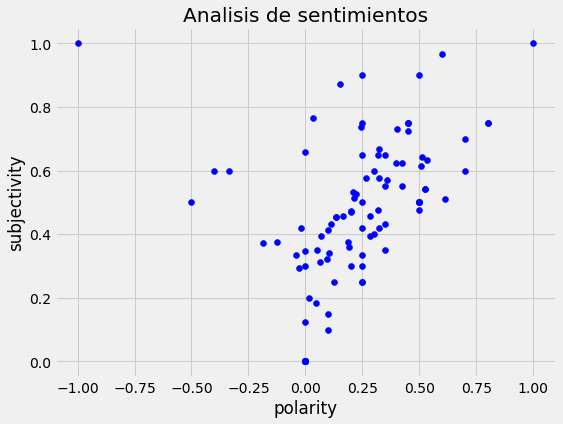

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='blue')

plt.title('Analisis de sentimientos')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [ ]:
ptweet = df[df.Analysis == 'Positive']
pteet = ptweet['Tweets']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

77.0

In [ ]:
ntweet = df[df.Analysis == 'Negative']
nteet = ntweet['Tweets']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

10.0

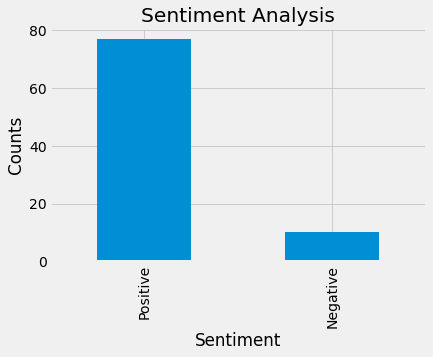

In [ ]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()